<a href="https://colab.research.google.com/github/davidnoone/ExampleData/blob/main/Simple_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetCDF and plotting example.

This example shows how to read data from a netcdf file, and how to make some simple plots. 

**Learning goals:**
 * Utilize notebook framework
 * Read data stored in netcdf format
 * Produce a contour map

**Python modules**
* [numpy](https://numpy.org/doc/stable/user/) for manipulating arrays of gridded data
* [netCDF4](https://unidata.github.io/netcdf4-python/) module for reading NetCDF files
* [Matplotlib](https://matplotlib.org/3.1.1/index.html) library for displaying graphics
* (Bonus: [cartopy](https://scitools.org.uk/cartopy/docs/latest/) for managing fancy map projections)




**Using this notebook**: Remember to save your own copy! Once this note book has loaded, save a copy to your google grive or similar location. Otherwise, you will lose any code work you do when you reload. 

**Notebooks**: Notice that `netCDF4` and `cartopy` is not installed by default on `colab` so must be installed for each session.
Takes a few moments.


In [1]:
!pip install netCDF4
!pip install cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.3 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113676 sha256=69a1fbfe8687eafe3b0ed5d86be08e332b693e8e607926c371b17152217ac4f3
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
Looking in inde

In [2]:
#
# Import the needed modules 
#

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs


print("All modules needed have been imported. Ready to continue!")

All modules needed have been imported. Ready to continue!


## Obtaining the data

NetCDF is a standard data format which is used widely for atmospehric and oceanic data sets. The data format is structured, and remarkably convienient once youget te hang of it. 

Data sets have dimensions (number of latitude, number of longitudes) and variables (temperature). Some variables describe the coordinates (i.e., longitude and latitude values).


In [3]:
# Download a data file from github, if it doesn't exist
!test ! -f ERA5_pr_2021-01-01.nc && wget 'https://raw.github.com/davidnoone/GEOPHYS_NOTEBOOKS/main/data/ERA5_pr_2021-01-01.nc'

--2023-03-09 19:56:20--  https://raw.github.com/davidnoone/GEOPHYS_NOTEBOOKS/main/data/ERA5_pr_2021-01-01.nc
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/davidnoone/GEOPHYS_NOTEBOOKS/main/data/ERA5_pr_2021-01-01.nc [following]
--2023-03-09 19:56:20--  https://raw.githubusercontent.com/davidnoone/GEOPHYS_NOTEBOOKS/main/data/ERA5_pr_2021-01-01.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10561728 (10M) [application/octet-stream]
Saving to: ‘ERA5_pr_2021-01-01.nc’

ERA5_pr_2021-01-01. 100%[===================>]  10.07

In [4]:
# Code example to read data from a netcdf file.
# Some knowledge of the file structure and vaiables names in the file
# are needed. (They are ways to get this from within python)

# Set a filename: This is the file we just downloaded. 
filename = "ERA5_pr_2021-01-01.nc"

# Open the netcdf file
ds = nc.Dataset(filename,'r')

# Read the coodinate data
lons = ds.variables["longitude"][:]
lats = ds.variables["latitude"][:]
levs = ds.variables["level"][:]

nlon = len(lons)
nlat = len(lats)

# Read the temperature and wind data
k = 6         # choose which pressure level to read
print('Reading data at pressure:',levs[k])
temp = ds.variables["t"][0,k,:,:]
uwnd = ds.variables["u"][0,k,:,:]
vwnd = ds.variables["v"][0,k,:,:]

# It is good manners to close the file
ds.close()

print("Finished reading netcdf file.")


Reading data at pressure: 850
Finished reading netcdf file.


# Check the data

Convince yourself that the latitudes and longitudes were read in correctly. Print our their values to the screeed.
(You could do this with temperature as well, but it wil be many many values).


In [5]:
# Print the dimensions to the screen
print("Number of longitudes: nlon=", nlon)
print("Number of latitudes : nlat=", nlat)

# Print the latitude and longitude 
print('LONGITUES:',lons)
print('LATITUDES:',lats)

print('You selected level k=',k,' which is',levs[k])



Number of longitudes: nlon= 360
Number of latitudes : nlat= 181
LONGITUES: [-180. -179. -178. -177. -176. -175. -174. -173. -172. -171. -170. -169.
 -168. -167. -166. -165. -164. -163. -162. -161. -160. -159. -158. -157.
 -156. -155. -154. -153. -152. -151. -150. -149. -148. -147. -146. -145.
 -144. -143. -142. -141. -140. -139. -138. -137. -136. -135. -134. -133.
 -132. -131. -130. -129. -128. -127. -126. -125. -124. -123. -122. -121.
 -120. -119. -118. -117. -116. -115. -114. -113. -112. -111. -110. -109.
 -108. -107. -106. -105. -104. -103. -102. -101. -100.  -99.  -98.  -97.
  -96.  -95.  -94.  -93.  -92.  -91.  -90.  -89.  -88.  -87.  -86.  -85.
  -84.  -83.  -82.  -81.  -80.  -79.  -78.  -77.  -76.  -75.  -74.  -73.
  -72.  -71.  -70.  -69.  -68.  -67.  -66.  -65.  -64.  -63.  -62.  -61.
  -60.  -59.  -58.  -57.  -56.  -55.  -54.  -53.  -52.  -51.  -50.  -49.
  -48.  -47.  -46.  -45.  -44.  -43.  -42.  -41.  -40.  -39.  -38.  -37.
  -36.  -35.  -34.  -33.  -32.  -31.  -30.  -29. 

##Construct a map of temperature

To convince yourself that the data is good, and get a view of the atmospheric conditions, construct a contour map of the data showing the temperature. We're using matplotlib to do the plotting. 


For geophysical data, we also need to set up a map projection. The easiest map projection is cylindrical equidistant: treating latitude and longitude as cartesian coordinates. This works find for many instances, but does not work well near the poles. 

As a bonus, you might try to overlay the wind data as vectors do visualize the airflow. Do do this you can use the quiver function.

Also see documentation for matplotlib functions:
* [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) 
* [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)
*[quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)
* [colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

A [good example](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html) is on the cartopy documentation. You can limit the view with the "extent" keyword to give latitude and longitude bounds. Try limiting the map to just a local reagion.


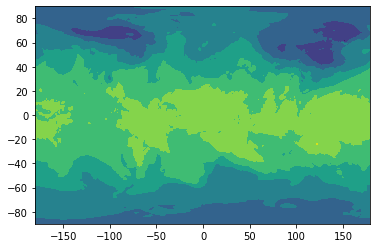

In [6]:
# Construct a map of the temperature data

## Simpliest possible case
p = plt.contourf(lons, lats, temp)





/usr/local/lib/python3.9/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


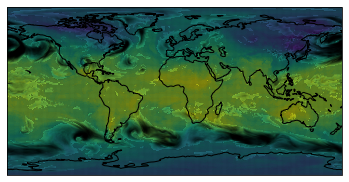

In [8]:
## Or here, with a map projection
ax = plt.axes(projection=ccrs.PlateCarree())
p = plt.contourf(lons, lats, temp,60, transform=ccrs.PlateCarree())
ax.coastlines()


## Try this to get vectors showing the streamlines
v = ax.quiver(lons, lats, uwnd, vwnd, transform=ccrs.PlateCarree())

##Outcome

Being able to obtain gridded datasets, visualize fields and manipulate the data is a fundemental activity in geophsyical fluids analysis. Having completed this notebook task, you've developed some essential building blocks on which more complex analysis can rely. 

All the of the modules used here have greater power than what we've looked at more details can be found at:

* [Numpy manual](https://numpy.org/doc/stable/user/)
* [NetCDF4 documentation](https://unidata.github.io/netcdf4-python/ )
* [Matplotlib](https://matplotlib.org/3.1.1/index.html)
* [Cartopy manual](https://scitools.org.uk/cartopy/docs/latest/)

There are many examples on these pages, which is an excellent resource for more complicated coding.




In [7]:
# Clean up data file
!rm ERA5_pr_2021-01-01.nc
print('Finished')

Finished
